In [ ]:
import pandas as pd
import numpy as np

READING THE DATA

In [ ]:
df = pd.read_csv("/content/spam.csv", encoding="latin-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
null_count=df.isna().sum()
null_count

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.dropna(how="any", axis=1, inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.rename(columns={'v1': 'target', 'v2': 'messages'}, inplace=True)
df

,target,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

# EDA:
**Now we are going to take a look about the target distribution and the messages length.**

In [ ]:
df['length'] = df['messages'].apply(lambda x: len(x))
df.head()



,target,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


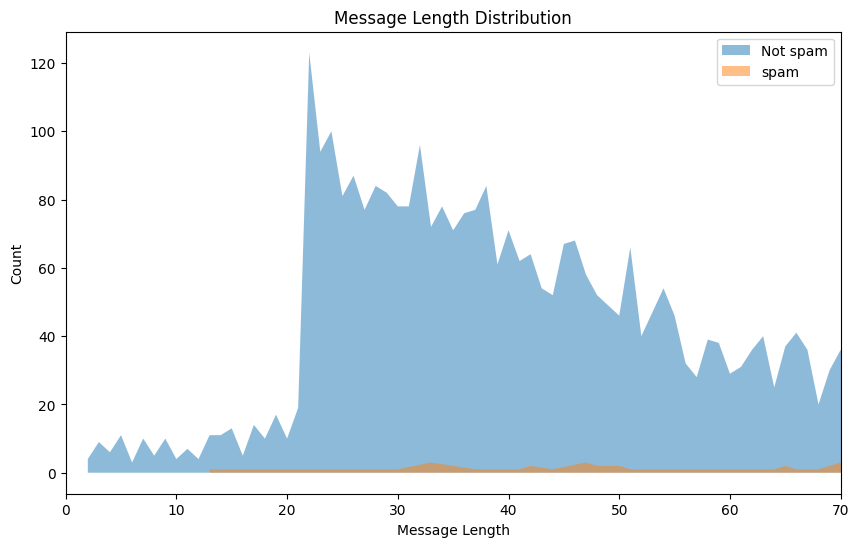

In [ ]:
import matplotlib.pyplot as plt

not_spam_df = df[df['target'] == 'ham']['length'].value_counts().sort_index()
spam_df = df[df['target'] == 'spam']['length'].value_counts().sort_index()

#plot size
plt.figure(figsize=(10,6))


# Create a filled area plot
plt.fill_between(not_spam_df.index, not_spam_df.values, label='Not spam', alpha=0.5)
plt.fill_between(spam_df.index, spam_df.values, label='spam', alpha=0.5)

# Set labels and title
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.title('Message Length Distribution')

# Show the legend
plt.legend()


# Set the x-axis range
plt.xlim(0, 70)

# Show the plot
plt.show()


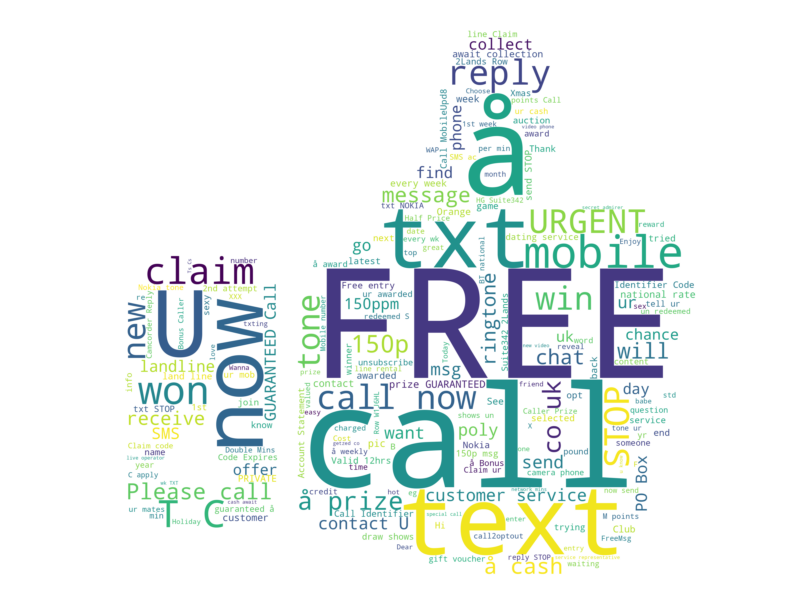

In [ ]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load a custom mask image
twitter_mask = np.array(Image.open('/content/upvote.png'))

# Create a WordCloud object with custom settings
wc = WordCloud(
    background_color='white',  # Background color of the word cloud
    max_words=200,  # Maximum number of words to display
    mask=twitter_mask  # Custom mask for the word cloud
)
# Generate the word cloud from the text data
wc.generate(' '.join(text for text in df.loc[df['target'] == 'spam', 'messages']))

# Set the figure size
plt.figure(figsize=(10, 10))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Remove the axis
plt.show()

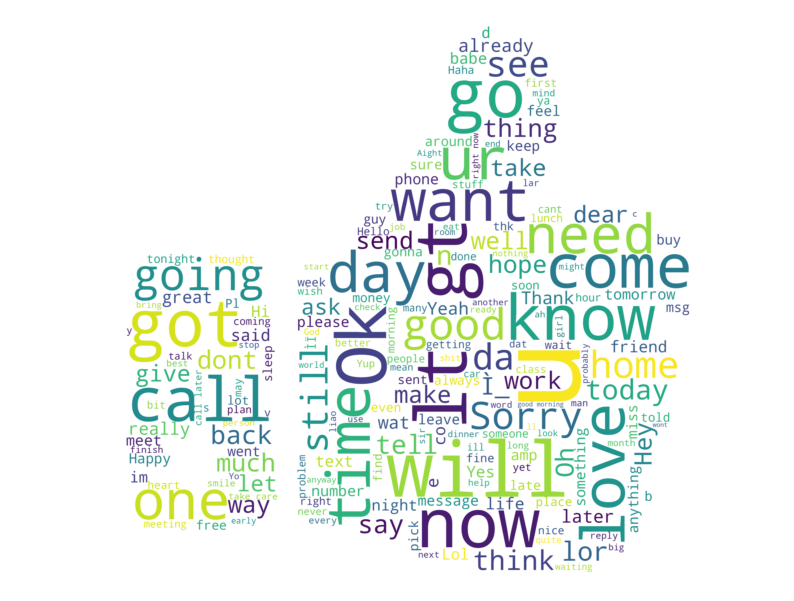

In [ ]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load a custom mask image
twitter_mask = np.array(Image.open('/content/upvote.png'))

# Create a WordCloud object with custom settings
wc = WordCloud(
    background_color='white',  # Background color of the word cloud
    max_words=200,  # Maximum number of words to display
    mask=twitter_mask  # Custom mask for the word cloud
)
# Generate the word cloud from the text data
wc.generate(' '.join(text for text in df.loc[df['target'] == 'ham', 'messages']))

# Set the figure size
plt.figure(figsize=(10, 10))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Remove the axis
plt.show()

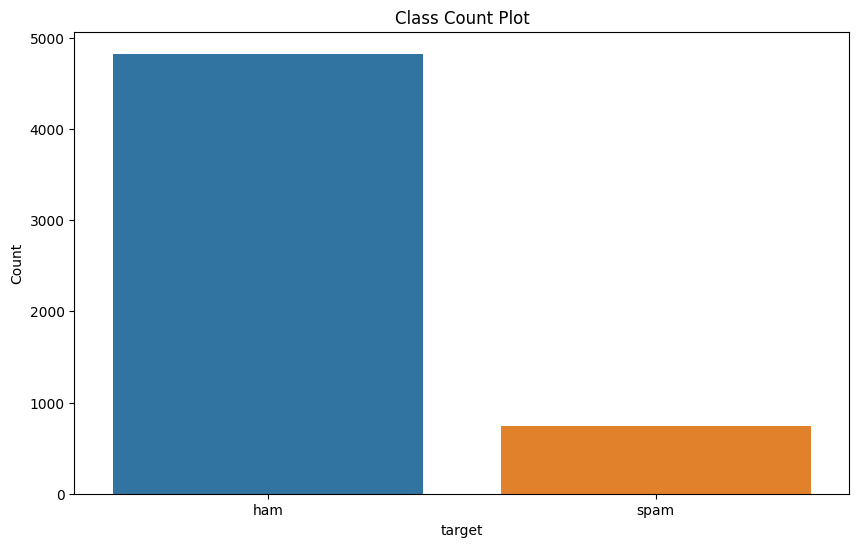

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the countplot
sns.countplot(x='target', data=df)

# Customize labels and title
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Class Count Plot')

# Show the plot
plt.show()


# From above It is seen that dataset is imbalanced So First we do our prediction based on imbalanced dataset then will do resampling to balance the given dataset and will compare the performance in both the cases.

# Text cleaning

**Removing stop words**:
Stop words do not contribute to the meaning of a sentence since they are common in a language. Stop words for the English language are pronouns, conjunctions, and articles. Removing stop words enables the NLP model to focus on unique words in the SMS messages that will add value.

**Converting all the SMS messages to lower case**:
It ensures that we have a uniform dataset.

**Removing numbers and other numeric values**:
It ensures that only text that remains in the dataset adds value to the model.

**Removing punctuations**:
It involves removing full stops and other punctuation marks. These are the unnecessary symbols in the dataset.

**Removing extra white spaces**:
White space occupies the dataset, but they do not carry information. Removing the extra white spaces ensures we only remain with the text that the model will use.

**Tokenization**:
It is the splitting/breaking of the raw texts into smaller words or phrases known as tokens. Here implementing the text cleaning steps using Natural Language Toolkit (NLTK).

**Lemmatizing the texts**:
Stemming reduces inflected forms of a text/word into its lemma or dictionary form. For example, the words/texts “running”, “ran”, and “runs” are all reduced to the root form “run”.

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
nltk.download('wordnet')
import re
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def convert_to_lower(text):
    return text.lower()

df['messages'] = df['messages'].apply(lambda x: convert_to_lower(x))

In [ ]:
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

df['messages'] = df['messages'].apply(lambda x: remove_numbers(x))

In [ ]:

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['messages'] = df['messages'].apply(lambda x: remove_punctuation(x))

In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

df['messages'] = df['messages'].apply(lambda x: remove_stopwords(x))

In [ ]:
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

df['messages'] = df['messages'].apply(lambda x: remove_extra_white_spaces(x))

In [ ]:
df.head()

,target,messages,length
0,ham,go jurong point crazy available bugis great wo...,111
1,ham,ok lar joking wif oni,29
2,spam,free entry wkly comp win fa cup final tkts st ...,155
3,ham,u dun say early hor c already say,49
4,ham,nah dont think goes usf lives around though,61


In [ ]:

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

df['messages'] = df['messages'].apply(lambda x: lemmatizing(x))

In [ ]:
df.head()

,target,messages,length
0,ham,go jurong point crazy available bugis great wo...,111
1,ham,ok lar joking wif oni,29
2,spam,free entry wkly comp win fa cup final tkts st ...,155
3,ham,u dun say early hor c already say,49
4,ham,nah dont think go usf life around though,61


In [ ]:
df['length_after_cleaning'] = df['messages'].apply(lambda x: len(x))
df.head()

,target,messages,length,length_after_cleaning
0,ham,go jurong point crazy available bugis great wo...,111,78
1,ham,ok lar joking wif oni,29,21
2,spam,free entry wkly comp win fa cup final tkts st ...,155,101
3,ham,u dun say early hor c already say,49,33
4,ham,nah dont think go usf life around though,61,40


Converting the class labels into integer values

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['target'])

df['target_encoded'] = le.transform(df['target'])
df.head()


,target,messages,length,length_after_cleaning,target_encoded
0,ham,go jurong point crazy available bugis great wo...,111,78,0
1,ham,ok lar joking wif oni,29,21,0
2,spam,free entry wkly comp win fa cup final tkts st ...,155,101,1
3,ham,u dun say early hor c already say,49,33,0
4,ham,nah dont think go usf life around though,61,40,0


Implementing text vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_wb= TfidfVectorizer()

In [ ]:
X_tf = tf_wb.fit_transform(df['messages'])

In [ ]:
print(X_tf.shape)

(5572, 7858)


Splitting the vectorized dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, df['target_encoded'].values, test_size=0.3, stratify=df['target_encoded'].values)


In [ ]:
print(X_train_tf.shape, X_test_tf.shape, y_train_tf.shape, y_test_tf.shape)

(3900, 7858) (1672, 7858) (3900,) (1672,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
NB=MultinomialNB()

In [ ]:
NB.fit(X_train_tf, y_train_tf)

MultinomialNB()

Making predictions using the test set

In [ ]:
y_pred_tf= NB.predict(X_test_tf)
from sklearn.metrics import classification_report



# Create a classification report
report = classification_report(y_test_tf, y_pred_tf)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1448
           1       1.00      0.72      0.84       224

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



Implementing Imbalanced Dataset Handling

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['messages'], df['target_encoded'].values, test_size=0.30,stratify=df['target_encoded'].values)


In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 3377, 1: 523})

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer()

In [ ]:
X_train_tf = vectorizer.transform(X_train)
X_train_tf = X_train_tf.toarray()

In [ ]:
X_test_tf = vectorizer.transform(X_test)
X_test_tf = X_test_tf.toarray()

In [ ]:
ROS = RandomOverSampler(sampling_strategy=1)

In [ ]:
X_train_ros, y_train_ros = ROS.fit_resample(X_train_tf, y_train)

In [ ]:
Counter(y_train_ros)

Counter({0: 3377, 1: 3377})

# Using the balanced dataset to build the same model

In [ ]:
nb = MultinomialNB()

In [ ]:
nb.fit(X_train_ros, y_train_ros)

MultinomialNB()

In [ ]:
y_preds = nb.predict(X_test_tf)
print(y_preds)

[0 0 0 ... 0 0 0]


In [ ]:

from sklearn.metrics import classification_report

# Create a classification report
report = classification_report(y_test, y_preds)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1448
           1       0.79      0.95      0.87       224

    accuracy                           0.96      1672
   macro avg       0.89      0.96      0.92      1672
weighted avg       0.97      0.96      0.96      1672



SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(df['messages'], df['target_encoded'].values, test_size=0.30,stratify=df['target_encoded'].values)
from collections import Counter
Counter(y_train_sm)

Counter({0: 3377, 1: 523})

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train_sm)

TfidfVectorizer()

In [ ]:
X_train_sm_tf = vectorizer.transform(X_train_sm)
X_train_sm_tf = X_train_sm_tf.toarray()


In [ ]:
X_test_sm_tf = vectorizer.transform(X_test_sm)
X_test_sm_tf = X_test_sm_tf.toarray()

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [ ]:
X_train_smo, y_train_smo = ROS.fit_resample(X_train_sm_tf, y_train_sm)

In [ ]:
Counter(y_train_smo)

Counter({0: 3377, 1: 3377})

# Naive's Bays

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_smo, y_train_smo)
y_preds_sm = nb.predict(X_test_sm_tf)
from sklearn.metrics import classification_report

# Create a classification report
report = classification_report(y_test_sm, y_preds_sm)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1448
           1       0.79      0.94      0.86       224

    accuracy                           0.96      1672
   macro avg       0.89      0.95      0.92      1672
weighted avg       0.96      0.96      0.96      1672



This F1 score is 0.87. The accuracy score has increased from 0.83 to 0.87. Therefore, balancing the classes has enhanced the model performance giving better results.

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_smo, y_train_smo)

y_pred_log = model.predict(X_test_sm_tf)
print(classification_report(y_test_sm, y_pred_log))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1448
           1       0.93      0.92      0.93       224

    accuracy                           0.98      1672
   macro avg       0.96      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create an instance of the SVM classifier
svm_model = SVC(kernel='linear', C=1.0)

# Fit the SVM model to the training data
svm_model.fit(X_train_smo, y_train_smo)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test_sm_tf)

# Evaluate the SVM model
print(classification_report(y_test_sm, y_pred_svm))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1448
           1       0.96      0.92      0.94       224

    accuracy                           0.98      1672
   macro avg       0.97      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create an instance of the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model to the training data
rf_model.fit(X_train_smo, y_train_smo)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_sm_tf)

# Evaluate the Random Forest model
print(classification_report(y_test_sm, y_pred_rf))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.99      0.85      0.92       224

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Create an instance of the XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Fit the XGBoost model to the training data
xgb_model.fit(X_train_smo, y_train_smo)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test_sm_tf)

# Evaluate the XGBoost model
print(classification_report(y_test_sm, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1448
           1       0.93      0.88      0.90       224

    accuracy                           0.97      1672
   macro avg       0.96      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
from sklearn.metrics import f1_score


# F1 scores for different models
f1 = f1_score(y_test_sm, y_preds_sm)
f2 = f1_score(y_test_sm, y_pred_log)
f3 = f1_score(y_test_sm, y_pred_svm)
f4 = f1_score(y_test_sm, y_pred_rf)
f5 = f1_score(y_test_sm, y_pred_xgb)

# Model names
model_names = ['Naive Bayes', 'Logistic Regression', 'Support Vector Machine', 'Random Forest Classifier', 'XG Boost']

# Create a DataFrame for the table
df = pd.DataFrame({'Model Name': model_names, 'F1 Score': [f1, f2, f3, f4, f5]})

# Display the table
print(df)






                 Model Name  F1 Score
0               Naive Bayes  0.858896
1       Logistic Regression  0.926174
2    Support Vector Machine  0.938497
3  Random Forest Classifier  0.916067
4                  XG Boost  0.903226


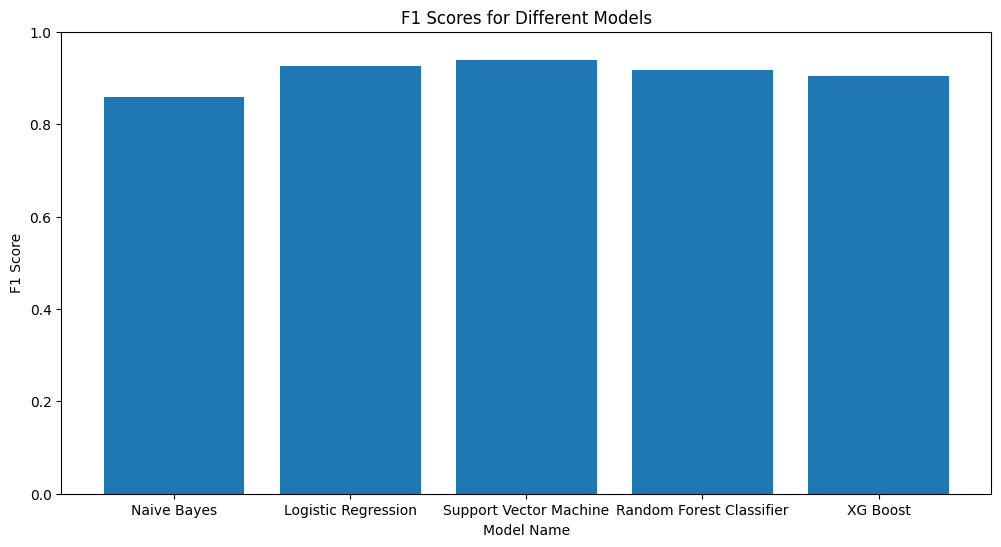

In [ ]:
# Create a bar graph to visualize F1 scores
plt.figure(figsize=(12, 6))
plt.bar(model_names, [f1, f2, f3, f4, f5])
plt.xlabel('Model Name')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models')
plt.ylim(0, 1.0)
plt.show()

# NOW FROM ABOVE IT SEEN THAT SUPPORT VECTOR MACHINE PERFORMS WELL COMPARED TO OTHER MODELS WITH BALANCED DATASET.

# NOW GOING TO DEPLOY THE BEST FOUND OUT MODEL BEFORE THAT NEED TO CONVERT ABOVE CODE INTO APPLICATION FORM